In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import datetime as datetime
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Extract the dataset

In [2]:
df = pd.read_csv("ipl2017.csv")
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [3]:
test=pd.DataFrame([['Saurashtra Cricket Association Stadium','Royal Challengers Bangalore','Sunrisers Hyderabad',160,2,16.2,10,50]],columns=['venue','bat_team','bowl_team','runs','wickets','overs','striker','non-striker'])


## Drop unwanted columns

In [4]:
data=df.drop(['mid'], axis = 1) 

In [5]:
data.isnull().sum()

date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [6]:
data['date']=pd.to_datetime(data['date'])

In [7]:
data['year']=data['date'].dt.year

In [8]:
data.head()

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,year
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222,2008
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222,2008
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222,2008
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222,2008
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222,2008


In [9]:
data.drop('date',axis=1,inplace=True)

In [10]:
cols=['total','year','runs','wickets','runs_last_5','wickets_last_5','striker','non-striker']

In [11]:
data.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,year
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222,2008
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222,2008
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222,2008
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222,2008
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222,2008


## Histogrm

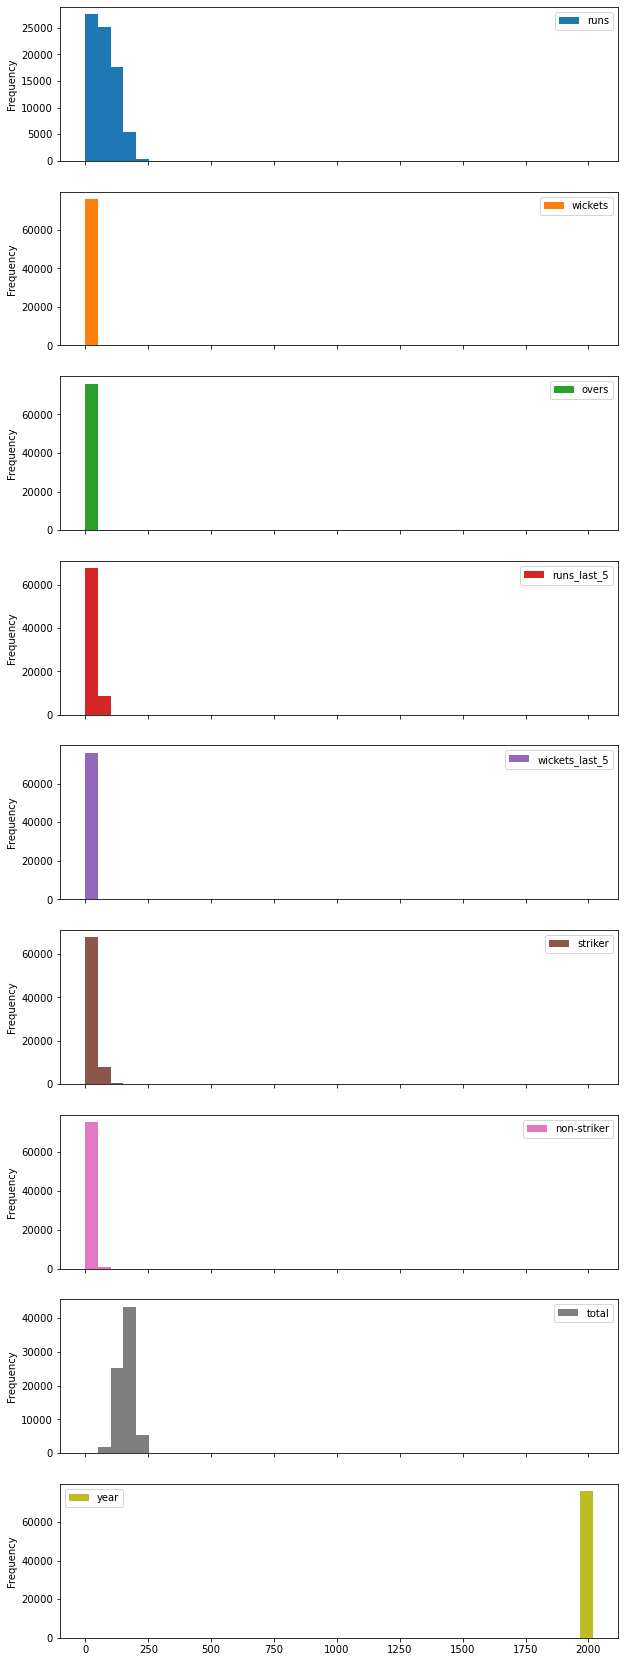

In [12]:
data.plot.hist(figsize=(10,30),bins=40,subplots=True);

In [13]:
table=pd.pivot_table(data,values='total',columns='year',index='bat_team',aggfunc=np.mean,fill_value=0).astype(int)

In [14]:
table.reset_index(inplace=True)

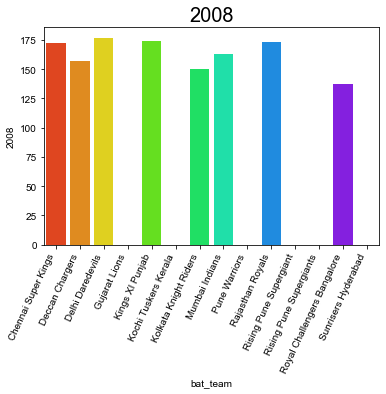

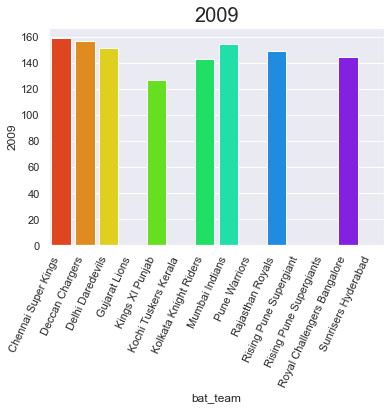

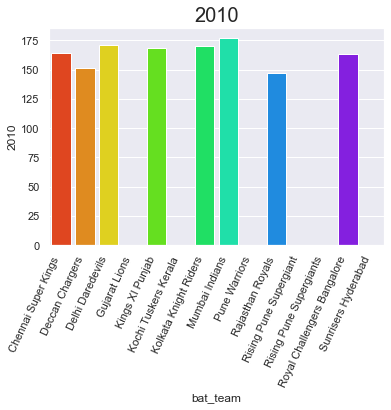

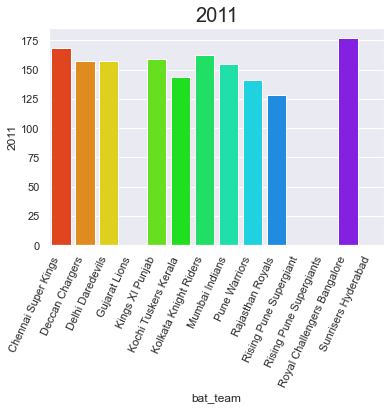

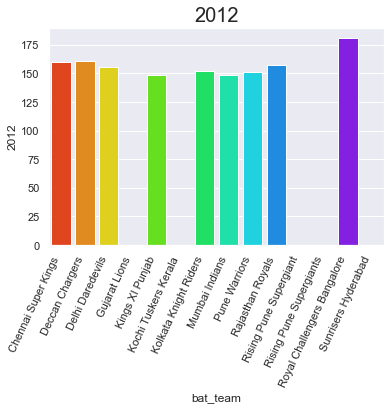

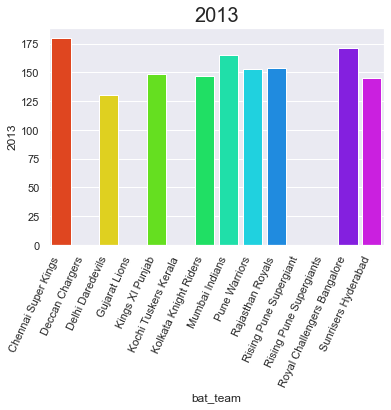

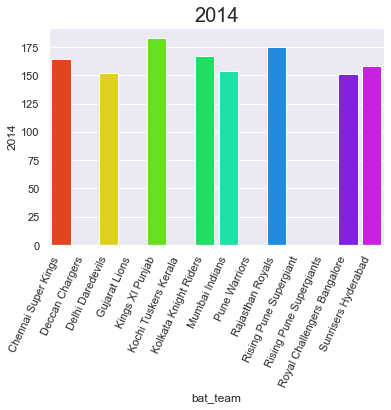

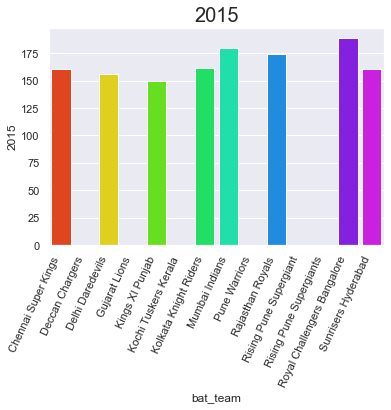

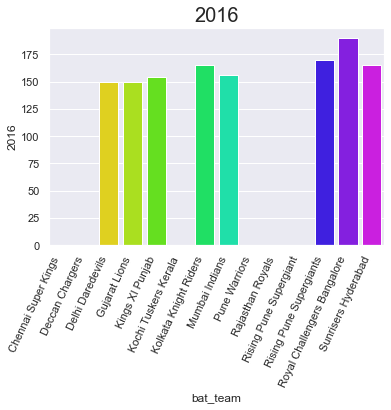

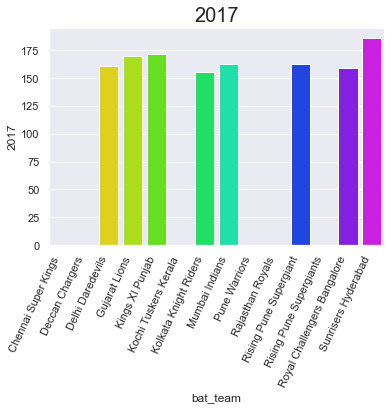

In [15]:
for i in table.columns[1:]:
    plt.title(i,fontsize=20)
    chart=sns.barplot(data=table,x='bat_team',y=i,palette='gist_rainbow')
    chart=chart.set_xticklabels(chart.get_xticklabels(),horizontalalignment='right',rotation=65,fontweight='light')
    sns.set(style='darkgrid')
    plt.show()

## LabelEncoding

In [16]:
le=LabelEncoder()
data['venue']=le.fit_transform(data['venue'])
test['venue']=le.fit_transform(test['venue'])
data['bat_team']=le.fit_transform(data['bat_team'])
test['bat_team']=le.fit_transform(test['bat_team'])
data['bowl_team']=le.fit_transform(data['bowl_team'])
test['bowl_team']=le.fit_transform(test['bowl_team'])

## Split data into training and testing

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['total','batsman','bowler','runs_last_5','wickets_last_5','year'],axis=1),data['total'], test_size=0.3, random_state=42)

## Perform StandardScaler

In [18]:
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)
test=std.transform(test)


In [19]:
jin=RandomForestRegressor(n_estimators=40)

## Fit the model on Training Dataset

In [20]:
jin.fit(X_train,y_train)

RandomForestRegressor(n_estimators=40)

## Test the model on Tesing Dataset

In [21]:
jin.score(X_test,y_test)

0.9203727914808941

## Prediction

In [22]:
prediction = jin.predict(test)

In [23]:
prediction

array([204.975])